### The purpose of this project is to practice some basic Data cleaning principals, and perhaps gain some insights as to the types of projects that are most successful on kickstarter.



### First, we check for any missing values in our data set

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('ks-projects-201801.csv')

#missing data points
missing_data_points = data.isnull().sum()
percentage_missing = missing_data_points.sum()/np.product(data.shape)

print(missing_data_points)


ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64


### Next, we need to know why the data was missing. 

Is the missing data meaningful? IE, doeos a blank value indicate something useful like a lack of financing, etc?

#### USD pledged
In this particular project, USD pledged is the result of one of the scrapers which is not accurately representing the pledged amounts. USD pledged real (after some research) is closer to the actual values, so we will drop the whole USD pledged collumn, and just use USD pledged real

#### Country Code

N,0" is an error in the KS data, for now, we will change it to N/A

#### Missing name category
For this project if a name is missing from a project we will drop it.

In [26]:
trunc_data = data.drop('usd pledged',axis=1)
trunc_data = trunc_data.dropna()


ID                                               name  \
0       1000002330                    The Songs of Adelaide & Abullah   
1       1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2       1000004038                                     Where is Hank?   
3       1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4       1000011046  Community Film Project: The Art of Neighborhoo...   
...            ...                                                ...   
378656   999976400  ChknTruk Nationwide Charity Drive 2014 (Canceled)   
378657   999977640                                          The Tribe   
378658   999986353  Walls of Remedy- New lesbian Romantic Comedy f...   
378659   999987933                           BioDefense Education Kit   
378660   999988282                  Nou Renmen Ayiti!  We Love Haiti!   

               category main_category currency    deadline     goal  \
0                Poetry    Publishing      GBP  2015-10-09   1000.0   
1        Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2        Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3                 Music         Music      USD  2012-04-16   5000.0   
4          Film & Video  Film & Video      USD  2015-08-29  19500.0   
...                 ...           ...      ...         ...      ...   
378656      Documentary  Film & Video      USD  2014-10-17  50000.0   
378657   Narrative Film  Film & Video      USD  2011-07-19   1500.0   
378658   Narrative Film  Film & Video      USD  2010-08-16  15000.0   
378659       Technology    Technology      USD  2016-02-13  15000.0   
378660  Performance Art           Art      USD  2011-08-16   2000.0   

                   launched  pledged     state  backers country  \
0       2015-08-11 12:12:28      0.0    failed        0      GB   
1       2017-09-02 04:43:57   2421.0    failed       15      US   
2       2013-01-12 00:20:50    220.0    failed        3      US   
3       2012-03-17 03:24:11      1.0    failed        1      US   
4       2015-07-04 08:35:03   1283.0  canceled       14      US   
...                     ...      ...       ...      ...     ...   
378656  2014-09-17 02:35:30     25.0  canceled        1      US   
378657  2011-06-22 03:35:14    155.0    failed        5      US   
378658  2010-07-01 19:40:30     20.0    failed        1      US   
378659  2016-01-13 18:13:53    200.0    failed        6      US   
378660  2011-07-19 09:07:47    524.0    failed       17      US   

        usd_pledged_real  usd_goal_real  
0                    0.0        1533.95  
1                 2421.0       30000.00  
2                  220.0       45000.00  
3                    1.0        5000.00  
4                 1283.0       19500.00  
...                  ...            ...  
378656              25.0       50000.00  
378657             155.0        1500.00  
378658              20.0       15000.00  
378659             200.0       15000.00  
378660             524.0        2000.00  

[378657 rows x 14 columns]

In [35]:
chart_labels = trunc_data.main_category.unique()

Here we verify the removal of our null data

In [28]:
trunc_data.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

First, let's look at what projects are most popular on kickstarter

In [72]:
label_count = []
pie_angles =[]
explode_values = []
for i in chart_labels:
    label_count.append((data['category'] == i).sum())

for i in label_count:
    pie_angles.append((i/sum(label_count))*360)
    
for i in label_count:
    explode_values.append(.5)
    

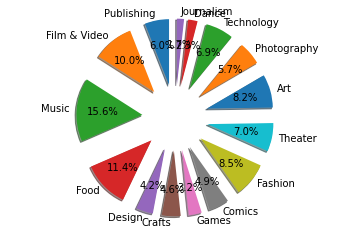

In [73]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = chart_labels
sizes = pie_angles
explode = (explode_values)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()